In [22]:
import tensorflow as tf
tf.__version__

'1.4.0'

In [23]:
from tensorflow.contrib import keras

In [24]:
from keras import backend as K
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
import numpy as np
import time
import os

np.random.seed(1337)

In [25]:
from keras.models import Sequential
#from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras import backend as K
from numpy import nan
import sys
import datetime

now = datetime.datetime.now

In [26]:
from matplotlib import pyplot as plt

%matplotlib inline

In [27]:
IMG_WIDTH = 224
IMG_HEIGHT = 224

In [28]:
img_rows, img_cols = IMG_WIDTH, IMG_HEIGHT

if K.image_data_format() == 'channels_first':
    shape_ord = (3, img_rows, img_cols)
else:  # channel_last
    shape_ord = (img_rows, img_cols, 3)


In [29]:
shape_ord

(224, 224, 3)

In [30]:
from keras.applications import vgg16
from keras.layers import Input

# build the VGG16 network with ImageNet weights
vgg16 = vgg16.VGG16(weights='imagenet', include_top=False, input_tensor=Input((224, 224, 3)))
print('Model loaded.')

Model loaded.


In [31]:
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization

In [32]:
for l in vgg16.layers:
    l.trainable = False

In [37]:
from keras import regularizers

x = Flatten(input_shape=vgg16.output.shape)(vgg16.output)
x = Dense(4096, activation='relu', name='fully_connected_1')(x)
x = Dropout(0.5)(x)
x = Dense(4096, activation='relu', name='fully_connected_2',W_regularizer=regularizers.l2(0.01),
          activity_regularizer=regularizers.l1_l2(0.01))(x)
x = Dropout(0.5)(x)
x = Dense(2048, activation='relu', name='fully_connected_3',W_regularizer=regularizers.l2(0.01),
          activity_regularizer=regularizers.l1_l2(0.01))(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
predictions = Dense(4, activation = 'softmax')(x)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4096, activation="relu", name="fully_connected_2", activity_regularizer=<keras.reg..., kernel_regularizer=<keras.reg...)`
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2048, activation="relu", name="fully_connected_3", activity_regularizer=<keras.reg..., kernel_regularizer=<keras.reg...)`


In [38]:
from keras.models import Model

model = Model(inputs=vgg16.input, outputs=predictions)

#compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [40]:
train_datagen = ImageDataGenerator(
        zoom_range=0.2,
#         featurewise_center=True,
#         featurewise_std_normalization=True,
        rotation_range=20,
        horizontal_flip=True,
        vertical_flip=True)

In [41]:
train_generator = train_datagen.flow_from_directory(
        '../data/train',
        target_size=(224, 224),
        batch_size=32, #changed from 1, change back if needed
        class_mode='categorical')

Found 3436 images belonging to 4 classes.


In [42]:
validation_datagen = ImageDataGenerator()

In [43]:
validation_generator = validation_datagen.flow_from_directory(
        '../data/validation',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

Found 1146 images belonging to 4 classes.


In [44]:
test_datagen = ImageDataGenerator(
        zoom_range=0.2,
#         featurewise_center=True,
#         featurewise_std_normalization=True,
        rotation_range=20,
        horizontal_flip=True,
        vertical_flip=True)

In [45]:
test_generator = test_datagen.flow_from_directory(
        '../data/test',
        target_size=(224,224),
        batch_size=32,
        class_mode='categorical')

Found 510 images belonging to 4 classes.


In [46]:
from keras.preprocessing import image

In [47]:
# Just seeing how it will do if I do an initialization run with 10% of my
# data (test generator is a misnomer - I didn't understand that the
# model never sees the 'validation' data), and then run it on my training data.
model.fit_generator(
        test_generator,
        steps_per_epoch=16,
        epochs=20,
        validation_data=validation_generator,
        validation_steps=35,
        use_multiprocessing=True)

Epoch 1/20
16/16 [==============================] - 48s 3s/step - loss: 17465.8031 - acc: 0.2766 - val_loss: 72.1256 - val_acc: 0.4634
Epoch 2/20
16/16 [==============================] - 34s 2s/step - loss: 73.3775 - acc: 0.4215 - val_loss: 73.9124 - val_acc: 0.4634
Epoch 3/20
16/16 [==============================] - 34s 2s/step - loss: 74.4430 - acc: 0.4204 - val_loss: 74.3260 - val_acc: 0.4634
Epoch 4/20
16/16 [==============================] - 34s 2s/step - loss: 74.3932 - acc: 0.4192 - val_loss: 74.3044 - val_acc: 0.4634
Epoch 5/20
16/16 [==============================] - 35s 2s/step - loss: 74.2879 - acc: 0.4199 - val_loss: 74.1929 - val_acc: 0.4634
Epoch 6/20
16/16 [==============================] - 34s 2s/step - loss: 74.1639 - acc: 0.4199 - val_loss: 74.0614 - val_acc: 0.4634
Epoch 7/20
16/16 [==============================] - 34s 2s/step - loss: 74.1497 - acc: 0.4178 - val_loss: 73.9218 - val_acc: 0.4634
Epoch 8/20
16/16 [==============================] - 33s 2s/step - loss: 7

In [48]:
model.evaluate_generator(validation_generator,steps=36)

[71.904298712445808, 0.46335078539232516]

In [49]:
model_weights = model.get_weights()
model_config = model.get_config()

In [50]:
model = Model.from_config(model_config)
model.set_weights(model_weights)

In [51]:
for l in model.layers:
    l.trainable = True

In [52]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit_generator(
        train_generator,
        steps_per_epoch=107,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=35,
        use_multiprocessing=True)

Epoch 1/30
108/107 [==============================] - 161s 1s/step - loss: 9.9958 - acc: 0.4552 - val_loss: 1.9021 - val_acc: 0.4634
Epoch 2/30
108/107 [==============================] - 148s 1s/step - loss: 1.6310 - acc: 0.4544 - val_loss: 1.4735 - val_acc: 0.4634
Epoch 3/30
108/107 [==============================] - 149s 1s/step - loss: 1.4242 - acc: 0.4540 - val_loss: 1.3773 - val_acc: 0.4634
Epoch 4/30
 51/107 [=============>................] - ETA: 1:03 - loss: 1.3891 - acc: 0.4363

In [70]:
model_history = _

In [71]:
model.evaluate_generator(validation_generator,steps = 35)

NameError: name 'model_2' is not defined

In [107]:
import cv2
import pandas as pd
from sklearn.metrics import classification_report

t = test_generator.class_indices

In [130]:
def test_report(model,t):
    df = pd.read_csv('../data/validation/xy.txt')
#    y_cat = np_utils.to_categorical([t[i] for i in df.order], 4)
    y_cat = []
    iml = []
    a = np.random.choice(np.arange(df.file_name.shape[0]),400)
    for i in a:
        f = df.file_name.iloc[i]
        o = df.order.iloc[i]
        i_path = '../data/validation/{}/{}'.format(o,f)
        iml.append(cv2.resize(cv2.imread(i_path,1),(224,224),interpolation = cv2.INTER_AREA))
        y_cat.append(o)
#     for f,o in zip(df.file_name,df.order):
#         i_path = '../data/test/{}/{}'.format(o,f)
#         iml.append(cv2.resize(cv2.imread(i_path,1),(224,224),interpolation = cv2.INTER_AREA))
    iml = np.stack(iml)
    test_datagen = ImageDataGenerator()
    test_generator = test_datagen.flow(iml,y_cat, batch_size=32)
    pred = model.predict(iml)
    inv_map = {v: k for k, v in t.items()}
    y_pred = [inv_map[np.argmax(i)] for i in pred]
    y_true = [inv_map[np.argmax(i)] for i in y_cat]
    print(classification_report(y_cat,y_pred))


In [131]:
y1 = test_report(model_2,t)

               precision    recall  f1-score   support

      Diptera       0.82      0.91      0.86        78
Ephemeroptera       0.93      0.83      0.88       194
   Plecoptera       0.69      0.84      0.75        55
  Trichoptera       0.76      0.75      0.76        73

  avg / total       0.84      0.83      0.83       400



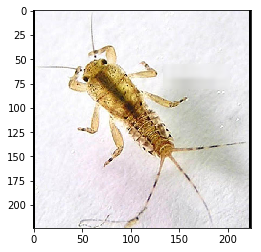

In [28]:
img = image.load_img('../data/test/Ephemeroptera/picture280.jpg', target_size=(224, 224))
plt.imshow(img)

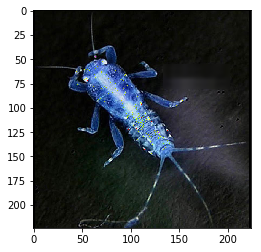

In [29]:
input_img_data = image.img_to_array(img)
# input_img_data /= 255
plt.imshow(input_img_data)

In [33]:
input_img_data = np.expand_dims(input_img_data, axis=0)
print('Input image shape:', input_img_data.shape)

Input image shape: (1, 224, 224, 3)


In [30]:
def get_activations(model, layer, input_img_data):
    activations_f = K.function([model.layers[0].input, K.learning_phase()], [layer.output,])
    activations = activations_f((input_img_data, False))
    return activations

In [31]:
from collections import OrderedDict
layer_dict = OrderedDict()
# get the symbolic outputs of each "key" layer (we gave them unique names).
for layer in vgg16.layers[1:]:
    layer_dict[layer.name] = layer

In [34]:
layer_name = 'block1_conv2'
layer = layer_dict[layer_name]
activations = get_activations(vgg16, layer, input_img_data)

In [36]:
print(len(activations))
activation = activations[0]
activation.shape

1


(1, 224, 224, 64)

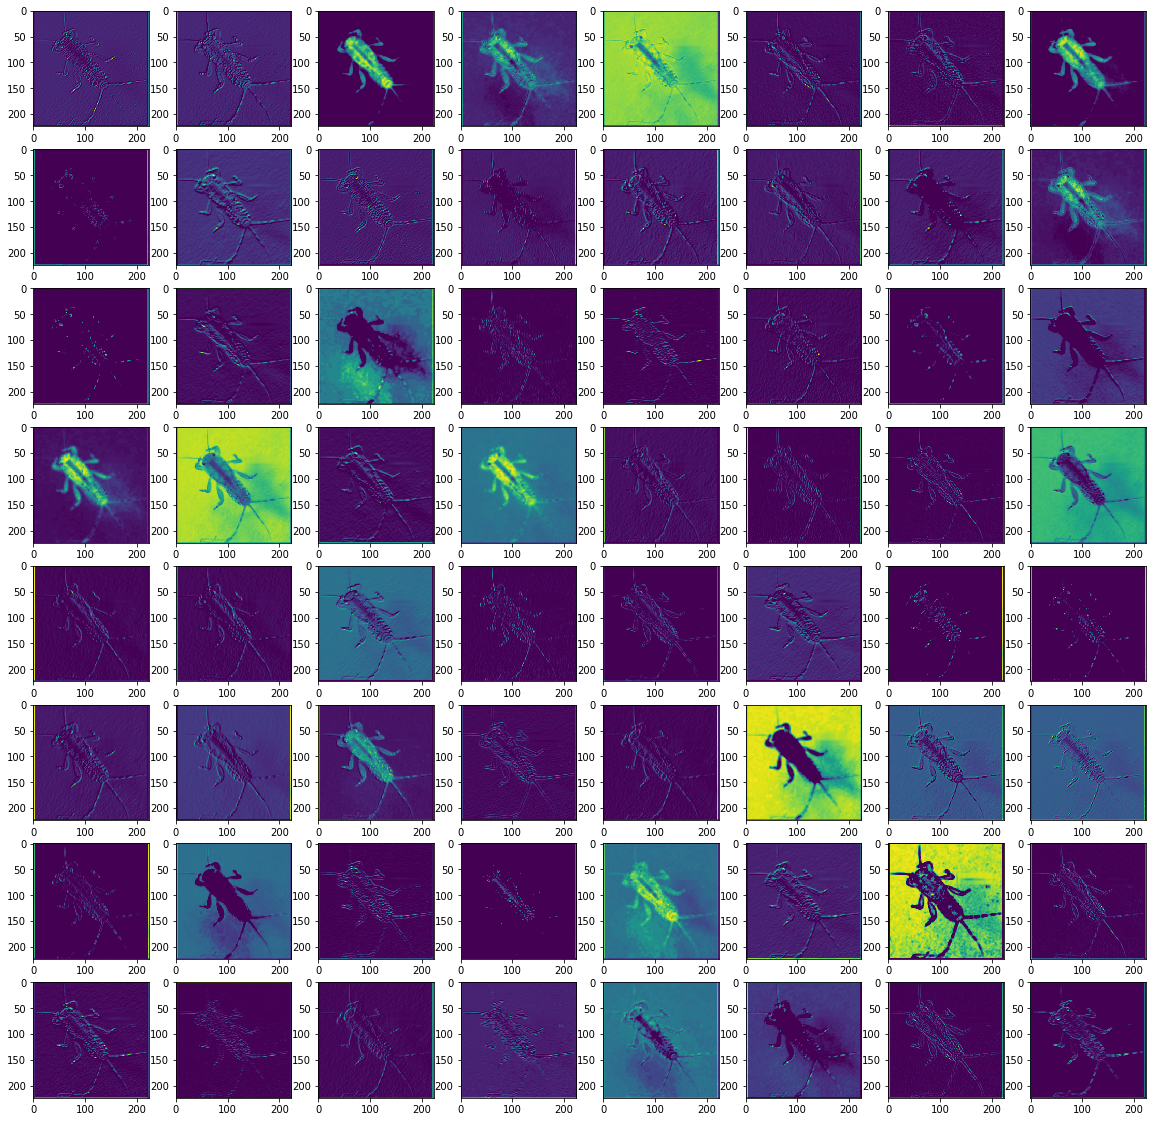

In [37]:
activated_img = activation[0]
n = 8
fig = plt.figure(figsize=(20, 20))
for i in range(n):
    for j in range(n):
        idx = (n*i)+j
        ax = fig.add_subplot(n, n, idx+1)
        ax.imshow(activated_img[:,:,idx])

In [38]:
conv_img_mean = np.mean(activated_img, axis=2)

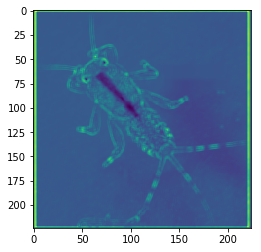

In [39]:
plt.imshow(conv_img_mean)

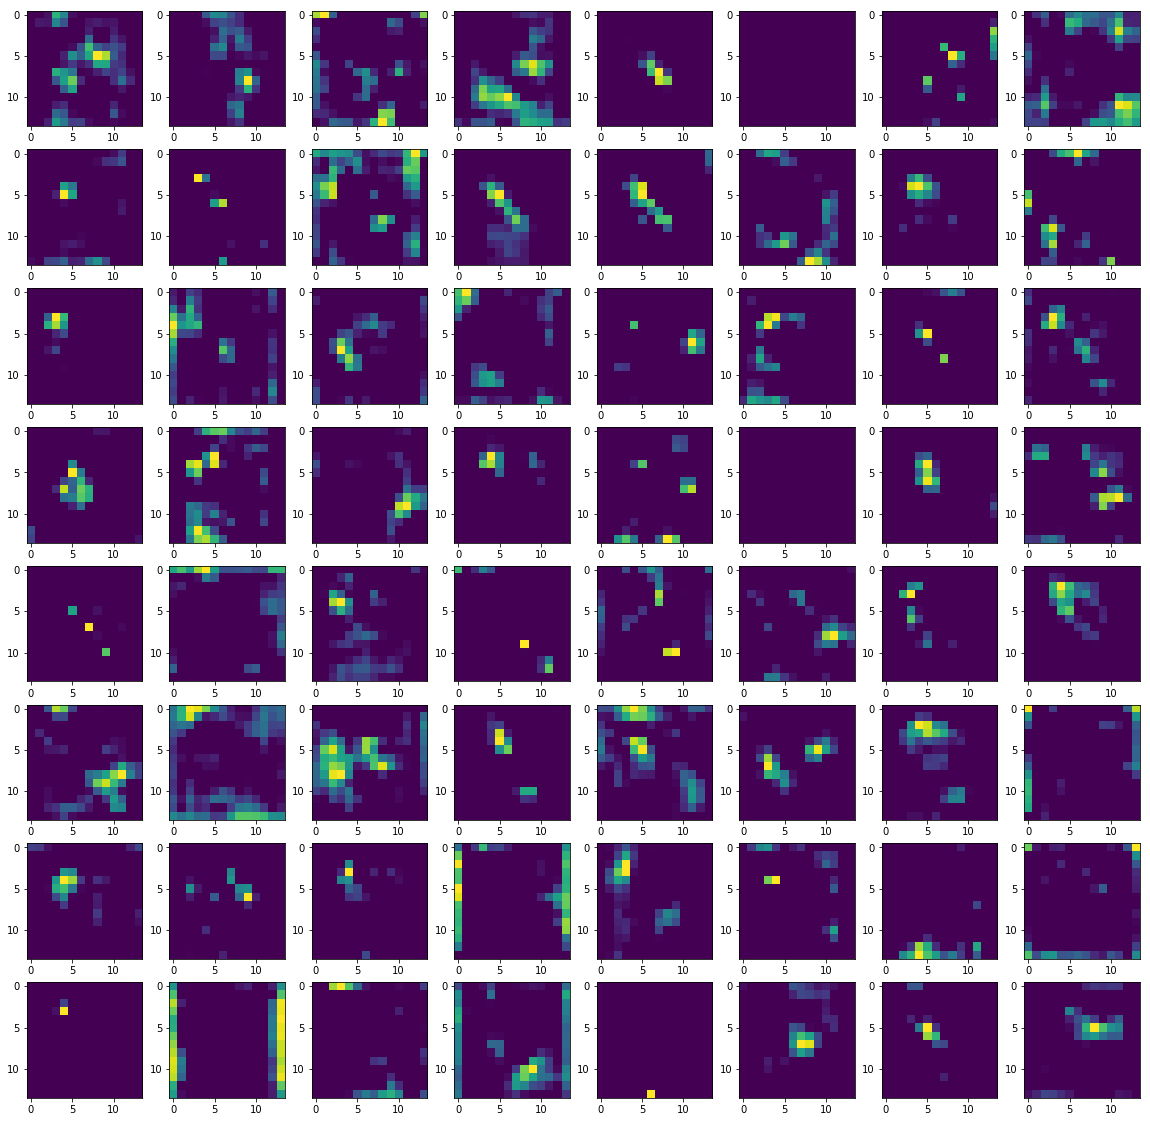

In [40]:
layer_name = 'block5_conv2'
layer = layer_dict[layer_name]
activations = get_activations(vgg16, layer, input_img_data)
activated_img = activations[0][0]  # [0][0] -> first (and only) activation, first (and only) sample in batch
n = 8
fig = plt.figure(figsize=(20, 20))
for i in range(n):
    for j in range(n):
        idx = (n*i)+j
        ax = fig.add_subplot(n, n, idx+1)
        ax.imshow(activated_img[:,:,idx])

In [41]:
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    if K.image_data_format() == 'channels_first':
        x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [42]:
img_width = 224
img_height = 224

def collect_filters(input_tensor, output_tensor, filters):
    kept_filters = []
    start_time = time.time()
    for filter_index in range(0, filters):
        if filter_index % 10 == 0:
            print('\t Processing filter {}'.format(filter_index))

        # we build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        if K.image_data_format() == 'channels_first':
            loss = K.mean(output_tensor[:, filter_index, :, :])
        else:
            loss = K.mean(output_tensor[:, :, :, filter_index])

        # we compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, input_tensor)[0]
        # normalization trick: we normalize the gradient by its L2 norm
        grads = grads / (K.sqrt(K.mean(K.square(grads))) + 1e-5)
        # this function returns the loss and grads given the input picture
        iterate = K.function([input_tensor], [loss, grads])

        # step size for gradient ascent
        step = 1.
        
        # we start from a gray image with some random noise
        if K.image_data_format() == 'channels_first':
            img_data = np.random.random((1, 3, img_width, img_height))
        else:
            img_data = np.random.random((1, img_width, img_height, 3))
        
        img_data = (img_data - 0.5) * 20 + 128

        # we run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_data])
            img_data += grads_value * step
            if loss_value <= 0.:
                # some filters get stuck to 0, we can skip them
                break

        # decode the resulting input image
        if loss_value > 0:
            img_deproc = deprocess_image(img_data[0])
            kept_filters.append((img_deproc, loss_value))
            
    end_time = time.time()
    print('\t Time required to process {} filters: {}'.format(filters, (end_time - start_time)))
            
    return kept_filters

In [43]:
input_t = vgg16.input

def generate_stiched_filters(layer, nb_filters):
    layer_name = layer.name
    print('Processing {} Layer'.format(layer_name))
    
    # Processing filters of current layer
    layer_output = layer.output
    kept_filters = collect_filters(input_t, layer_output, nb_filters)
    
    print('Filter collection: completed!')
    # we will stich the best sqrt(filters_to_scan) filters put on a n x n grid.
    limit = min(nb_filters, len(kept_filters))
    n = np.floor(np.sqrt(limit)).astype(np.int)

    # the filters that have the highest loss are assumed to be better-looking.
    # we will only keep the top 64 filters.
    kept_filters.sort(key=lambda x: x[1], reverse=True)
    kept_filters = kept_filters[:n * n]
    
    # build a black picture with enough space for
    margin = 5
    width = n * img_width + (n - 1) * margin
    height = n * img_height + (n - 1) * margin
    stitched_filters = np.zeros((width, height, 3))

    # fill the picture with our saved filters
    for i in range(n):
        for j in range(n):
            img, loss = kept_filters[i * n + j]
            stitched_filters[(img_width + margin) * i: (img_width + margin) * i + img_width,
                             (img_height + margin) * j: (img_height + margin) * j + img_height, :] = img
    return stitched_filters

Processing block1_conv2 Layer
	 Processing filter 0
	 Processing filter 10
	 Processing filter 20
	 Processing filter 30
	 Processing filter 40
	 Processing filter 50
	 Processing filter 60
	 Time required to process 64 filters: 24.73616671562195
Filter collection: completed!


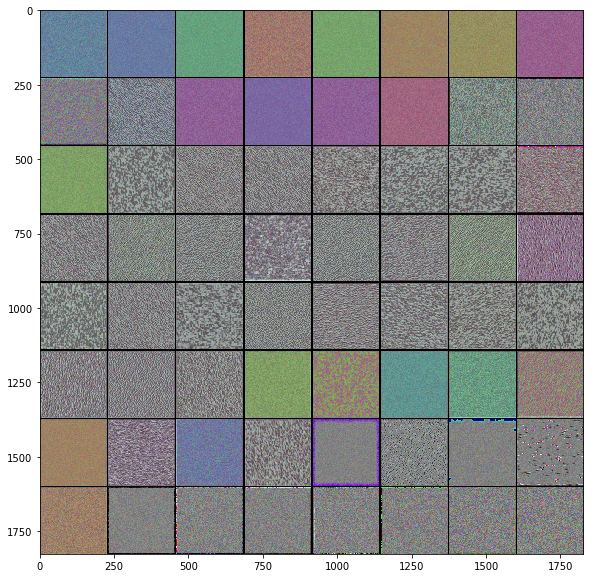

In [44]:
layer = layer_dict['block1_conv2']  # 64 filters
stitched_filters = generate_stiched_filters(layer, layer.filters)
plt.figure(figsize=(10,10))
plt.imshow(stitched_filters)

Processing block5_conv1 Layer
	 Processing filter 0
	 Processing filter 10
	 Processing filter 20
	 Processing filter 30
	 Processing filter 40
	 Processing filter 50
	 Processing filter 60
	 Time required to process 64 filters: 83.33093547821045
Filter collection: completed!


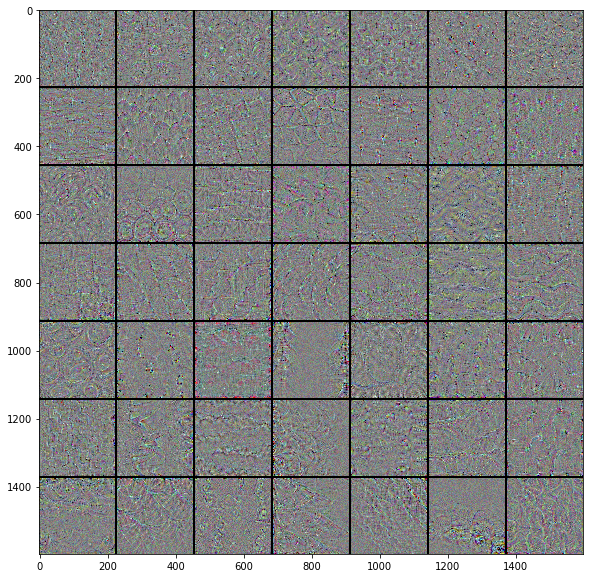

In [45]:
layer = layer_dict['block5_conv1']  # 512 filters in total
stitched_filters = generate_stiched_filters(layer, 64)
plt.figure(figsize=(10,10))
plt.imshow(stitched_filters)

In [50]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [51]:
model_2.fit_generator(
        train_generator,
        steps_per_epoch=107,
        epochs=20,
        validation_data=validation_generator,
        validation_steps=35,
        use_multiprocessing=True)

Epoch 1/20
108/107 [==============================] - 157s 1s/step - loss: 1.4829 - acc: 0.4123 - val_loss: 1.2256 - val_acc: 0.5122
Epoch 2/20
108/107 [==============================] - 148s 1s/step - loss: 1.3563 - acc: 0.4202 - val_loss: 1.3541 - val_acc: 0.4642
Epoch 3/20
108/107 [==============================] - 148s 1s/step - loss: 1.3084 - acc: 0.4502 - val_loss: 1.2499 - val_acc: 0.5105
Epoch 4/20
108/107 [==============================] - 147s 1s/step - loss: 1.2678 - acc: 0.4714 - val_loss: 1.3479 - val_acc: 0.2356
Epoch 5/20
108/107 [==============================] - 147s 1s/step - loss: 1.2615 - acc: 0.4746 - val_loss: 1.2924 - val_acc: 0.4634
Epoch 6/20
108/107 [==============================] - 146s 1s/step - loss: 1.2545 - acc: 0.4815 - val_loss: 1.2431 - val_acc: 0.4634
Epoch 7/20
108/107 [==============================] - 146s 1s/step - loss: 1.2505 - acc: 0.4857 - val_loss: 1.2493 - val_acc: 0.4738
Epoch 8/20
108/107 [==============================] - 146s 1s/step - 

In [52]:
model_2.evaluate_generator(validation_generator,steps=35)

[1.3884636099217866, 0.49912739965095987]

In [ ]:
def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['acc'])
    plt.plot(network_history.history['val_acc'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

plot_history(network_history)

In [ ]:
model_truncated = Sequential()
model_truncated.add(Dense(512, activation='relu', input_shape=(784,)))
model_truncated.add(Dropout(0.2))
model_truncated.add(Dense(512, activation='relu'))

for i, layer in enumerate(model_truncated.layers):
    layer.set_weights(model.layers[i].get_weights())

model_truncated.compile(loss='categorical_crossentropy', optimizer=SGD(), 
              metrics=['accuracy'])

In [ ]:
hidden_features = model_truncated.predict(X_train)

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(hidden_features[:1000]) ## Reduced for computational issues

In [ ]:
colors_map = np.argmax(Y_train, axis=1)

In [ ]:
colors = np.array([x for x in 'b-g-r-c-m-y-k-purple-coral-lime'.split('-')])
colors_map = colors_map[:1000]
plt.figure(figsize=(10,10))
for cl in range(nb_classes):
    indices = np.where(colors_map==cl)
    plt.scatter(X_tsne[indices,0], X_tsne[indices, 1], c=colors[cl], label=cl)
plt.legend()
plt.show()

In [23]:
# for l in model.layers:
#     l.trainable = True
# model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
# model.fit_generator(
#         train_generator,
#         steps_per_epoch=77,
#         epochs=20,
#         validation_data=validation_generator,
#         validation_steps=26,
#         use_multiprocessing=True)

Epoch 1/20
78/77 [==============================] - 128s 2s/step - loss: 1.7467 - acc: 0.3263 - val_loss: 1.4874 - val_acc: 0.3085
Epoch 2/20
78/77 [==============================] - 116s 1s/step - loss: 1.5617 - acc: 0.3124 - val_loss: 3.1769 - val_acc: 0.2577
Epoch 3/20
78/77 [==============================] - 116s 1s/step - loss: 1.4386 - acc: 0.3514 - val_loss: 1.3189 - val_acc: 0.3251
Epoch 4/20
78/77 [==============================] - 116s 1s/step - loss: 1.4188 - acc: 0.3369 - val_loss: 1.4653 - val_acc: 0.3499
Epoch 5/20
78/77 [==============================] - 116s 1s/step - loss: 1.3982 - acc: 0.3560 - val_loss: 1.2900 - val_acc: 0.4338
Epoch 6/20
78/77 [==============================] - 110s 1s/step - loss: 1.4065 - acc: 0.3458 - val_loss: 1.4939 - val_acc: 0.3652
Epoch 7/20
78/77 [==============================] - 116s 1s/step - loss: 1.3841 - acc: 0.3516 - val_loss: 1.3298 - val_acc: 0.3333
Epoch 8/20
78/77 [==============================] - 116s 1s/step - loss: 1.3908 - a

In [24]:
# from sklearn.model_selection import GridSearchCV
# from keras.wrappers.scikit_learn import KerasClassifier

In [170]:
model_history = _

In [25]:
from sklearn.metrics import classification_report

In [26]:
model.evaluate_generator(validation_generator,steps=26)

[1.556619799447116, 0.29669030739905988]

In [173]:
import pandas as pd
df = pd.read_csv('../data/test/xy.txt')
df.head()

file_name          order
0  photo_553054.jpg     Plecoptera
1  photo_585610.jpg        Diptera
2    photo_9719.jpg        Diptera
3   picture4281.jpg  Ephemeroptera
4   picture1347.jpg        Diptera

In [174]:
import cv2

In [175]:
t = test_generator.class_indices

In [176]:
y_cat = np_utils.to_categorical([t[i] for i in df.order], 4)
y_cat

array([[ 0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       ..., 
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.]])

In [177]:
iml = []
for f,o in zip(df.file_name,df.order):
    i_path = '../data/test/{}/{}'.format(o,f)
    iml.append(cv2.resize(cv2.imread(i_path,1),(224,224),interpolation = cv2.INTER_AREA))

In [178]:
#iml = np.array(iml)
y_cat = np.array(y_cat)
y_true = []
y_pred = []

counter = 0
# for xbatch, ybatch in test_datagen.flow(iml,y_cat, batch_size = 32):
#     y_true.append(ybatch)
#     y_pred.append(model.predict(xbatch))
#     if counter == 16:
#         break
#     counter += 1

iml = np.stack(iml)

test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow(iml,y_cat,
        batch_size=32)


In [179]:
pred = model.predict(iml)

In [180]:
inv_map = {v: k for k, v in t.items()}
y_pred = [inv_map[np.argmax(i)] for i in pred]

In [181]:
y_true = [inv_map[np.argmax(i)] for i in y_cat]

In [182]:
'''
_____________

From RUN TWO
_____________
'''

print(classification_report(y_true,y_pred))

               precision    recall  f1-score   support

      Diptera       0.75      0.91      0.82       116
Ephemeroptera       0.99      0.67      0.80       104
   Plecoptera       0.82      0.79      0.81        82
  Trichoptera       0.70      0.79      0.75        78

  avg / total       0.82      0.80      0.80       380



In [147]:
'''
_____________

From RUN ONE
_____________
'''
print(classification_report(y_true,y_pred))

               precision    recall  f1-score   support

      Diptera       0.79      0.91      0.85       113
Ephemeroptera       0.93      0.86      0.89       214
   Plecoptera       0.73      0.92      0.81        83
  Trichoptera       0.92      0.73      0.82       100

  avg / total       0.87      0.85      0.85       510



In [6]:
from keras.applications import vgg16
from keras.layers import Input

from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization

# build the VGG16 network with ImageNet weights
vgg2 = vgg16.VGG16(include_top=False,weights='imagenet',classes=4,input_tensor=Input((224,224,3)))
print('Model loaded.')

Model loaded.


In [7]:
vgg2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [40]:
# vgg16 = vgg16.VGG16(weights='imagenet', include_top=False, input_tensor=Input((224, 224, 3)))
# print('Model loaded.')

In [8]:
for l in vgg2.layers:
    l.trainable = False

In [9]:
x = Flatten(input_shape=vgg2.output.shape)(vgg2.output)
x = Dense(4096, activation='relu', name='ft_fc1')(x)
x = Dropout(0.5)(x)
x = Dense(2048, activation='relu', name='ft_fc2')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
predictions = Dense(4, activation = 'softmax')(x)

In [20]:
from keras.models import Model

model = Model(inputs=vgg2.input, outputs=predictions)

#compile the model
model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [12]:
train_datagen = ImageDataGenerator(
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True)

In [13]:
train_generator = train_datagen.flow_from_directory(
        '../data/train2',
        target_size=(224, 224),
        batch_size=32, #changed from 1, change back if needed
        class_mode='categorical')

Found 1506 images belonging to 5 classes.


In [14]:
validation_datagen = ImageDataGenerator()

In [15]:
validation_generator = validation_datagen.flow_from_directory(
        '../data/validation2',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

Found 502 images belonging to 5 classes.


In [16]:
test_datagen = ImageDataGenerator()

In [17]:
test_generator = test_datagen.flow_from_directory(
        '../data/test2',
        target_size=(224,224),
        batch_size=32,
        class_mode='categorical')

Found 224 images belonging to 5 classes.


In [18]:
# model.fit_generator(
#         train_generator,
#         steps_per_epoch=118,
#         epochs=20,
#         validation_data=validation_generator,
#         validation_steps=6,
#         use_multiprocessing=True)

Epoch 1/20


ValueError: Error when checking target: expected dense_1 to have shape (None, 4) but got array with shape (32, 5)

In [ ]:
for l in model.layers:
    l.trainable = True
model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit_generator(
        train_generator,
        steps_per_epoch=118,
        epochs=20,
        validation_data=validation_generator,
        validation_steps=6,
        use_multiprocessing=True)

In [25]:
# def make_model(dense_layer_sizes, dropout_sizes):
#     '''Creates model comprised of 2 convolutional layers followed by dense layers

#     dense_layer_sizes: List of layer sizes. This list has one number for each layer
#     nb_filters: Number of convolutional filters in each convolutional layer
#     nb_conv: Convolutional kernel size
#     nb_pool: Size of pooling area for max pooling
#     '''
    
#     x = Flatten(input_shape=vgg16.output.shape)(vgg16.output)
#     x = Dense(4096, activation='relu', name='ft_fc1')(x)
#     x = Dropout(0.5)(x)
#     x = Dense(2048, activation='relu', name='ft_fc12')(x)
#     x = Dropout(0.5)(x)
#     x = BatchNormalization()(x)
#     predictions = Dense(4, activation = 'softmax')(x)
    
#     for layer_size, d in dense_layer_sizes, dropout_sizes:
#         x = Dense(layer_size, activation = 'relu')(x)
#         x = Dropout(d)(x)
    
    
    
#     predictions = Dense(4, activation= 'softmax')(x)
#     model = Model(inputs=vgg16.input, outputs=predictions)

    
# #     model = Sequential()

# #     model.add(Conv2D(filters, (kernel_size, kernel_size),
# #                      padding='valid', input_shape=input_shape))
# #     model.add(Activation('relu'))
# #     model.add(Conv2D(filters, (kernel_size, kernel_size)))
# #     model.add(Activation('relu'))
# #     model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
# #     model.add(Dropout(0.25))

# #     model.add(Flatten())
# #     for layer_size in dense_layer_sizes:
# #         model.add(Dense(layer_size))
# #         model.add(Activation('relu'))
# #     model.add(Dropout(0.5))
# #     model.add(Dense(nb_classes))
# #     model.add(Activation('softmax'))

#     model.compile(loss='categorical_crossentropy',
#                   optimizer='adadelta',
#                   metrics=['accuracy'])

#     return model

In [26]:
dense_size_candidates = [[512,512],[1024,512],[1024,1024],[2048,1024]]
dropout_sizes = [[.5,.5],[.5,.25],[.25,.5],[.75,.5]]
my_classifier = KerasClassifier(make_model, batch_size=32)

In [28]:
validator = GridSearchCV(my_classifier,
                        param_grid={'dense_layer_sizes':dense_size_candidates,
                                    'dropout_sizes':dropout_sizes},
                         scoring='f1_samples',
                         n_jobs=-1
                        )

In [23]:
# validator.fit(
#         train_generator,
#         steps_per_epoch=118,
#         epochs=50,
#         validation_data=validation_generator,
#         validation_steps=10,
#         use_multiprocessing=True)